# HW-U1

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## HW-U1-1
请按自行安装Anaconda Python (可以参考课件，或者自行上网搜索），完成安装后，请导入第一单元提供的泰坦尼克号遇难者数据（Titanic-1.csv）； 编程完成下面的作业; 提交完成代码。
### (1)导入数据，后显示最初5条记录 

In [16]:
data=pd.read_csv("Titanic-1.csv")
data.head(5)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


### (2)分别统计
- (a)男女乘客性别比例；
- (b)男女乘客死亡比例； 
- (c)购买1st, 2nd, 3rd 票的乘客死亡比例；

In [21]:
# (a) gender proportion of all passengers
total=data["Sex"].value_counts()
total

male      851
female    462
Name: Sex, dtype: int64

In [22]:
# (b) gender proportion of death
total=data["Sex"].value_counts()
death=data[data["Survived"]==0]["Sex"].value_counts()
death/total

male      0.833137
female    0.333333
Name: Sex, dtype: float64

In [20]:
# (c) proportion of 1st,2nd,3rd passengers
total=data["PClass"].value_counts().reindex(['1st','2nd','3rd'])
death=data[data["Survived"]==0]["PClass"].value_counts().reindex(['1st','2nd','3rd'])
death/total

1st    0.400621
2nd    0.573477
3rd    0.805907
Name: PClass, dtype: float64

### (3) 请画，男女乘客比例出柱状图；

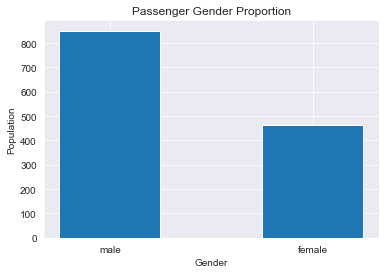

In [7]:
df=data["Sex"].value_counts() 
plt.bar(x=df.index,height=df.values,width=0.5)
plt.title("Passenger Gender Proportion")
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

## HW-U1-2  
请参考本单元的JupyterNotebook/Unit1-Demo的程序，用Python编程，计算并画出自由度为df=6,12,32,102]的t分布的概率密度曲线

### (1)作为对比，请在同一个图上画出以上自由度的概率密度函数。

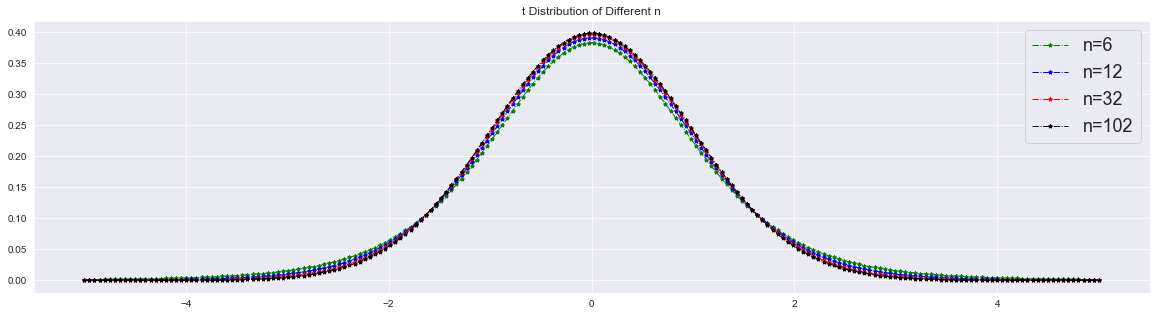

In [8]:
N=200
n_list=[6,12,32,102]
plt.figure(figsize=(20,5))
x=np.linspace(-5,5,N)
color=['g','b','r','k']
for i in range(4):
    y=stats.t.pdf(x,n_list[i])
    plt.plot(x,y,linestyle="-.",color=color[i],lw=1,marker="*",ms=4,label="n="+str(n_list[i]))
plt.title("t Distribution of Different n")
plt.legend(loc="best",fontsize=18)
plt.show()


### (2)请在第二幅图对比正态分布（均值：5， 方差：9）， t分布（均值：5，方差：9，df=30）


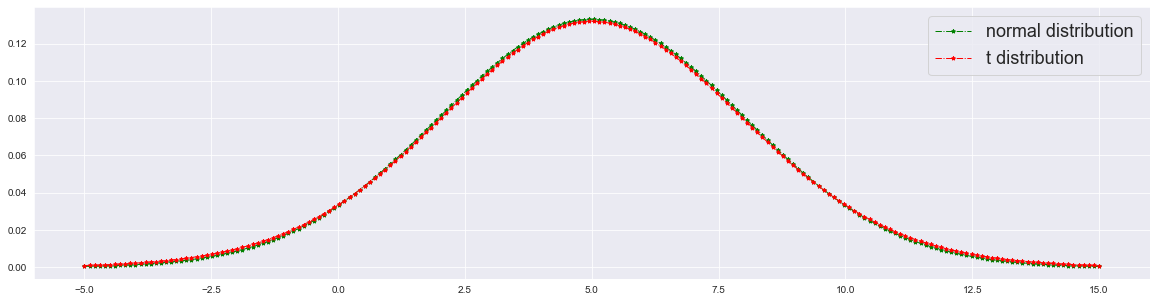

In [9]:
plt.figure(figsize=(20,5))
x=np.linspace(-5,15,N)
y_normal=stats.norm.pdf(x,5,3)
y_t=stats.t.pdf(x,df=30,scale=3,loc=5)
plt.plot(x,y_normal,linestyle="-.",color="g",lw=1,marker="*",ms=4,label="normal distribution")
plt.plot(x,y_t,linestyle="-.",color="r",lw=1,marker="*",ms=4,label="t distribution")
plt.legend(loc="best",fontsize=18)
plt.show()

## HW-U1-3  
根据单元提供的数据salary.csv中的样本：
### (1)画出数据库中NYC 不同区里不同教育程度人数的柱状图；

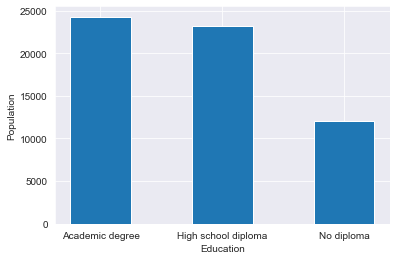

In [10]:
df=pd.read_csv("salary.csv")
data=df["Education"].value_counts()
plt.bar(x=data.index,height=data.values,width=0.5)
plt.xlabel("Education")
plt.ylabel("Population")
plt.show()

### (2)画出数据库中NYC不同区教育程度里各个区人数的柱状图；

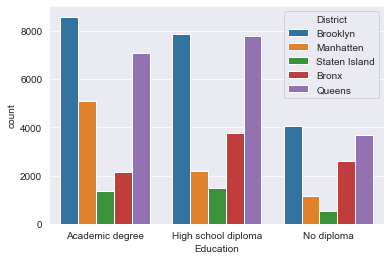

In [11]:
df=pd.read_csv("salary.csv")
sns.countplot(x="Education",hue="District",data=df)

### (3)画出不同教育程度, 不同性别的工资直方图，带KDE(kernel density estimation)并修改图中图标（legend）的字体大小

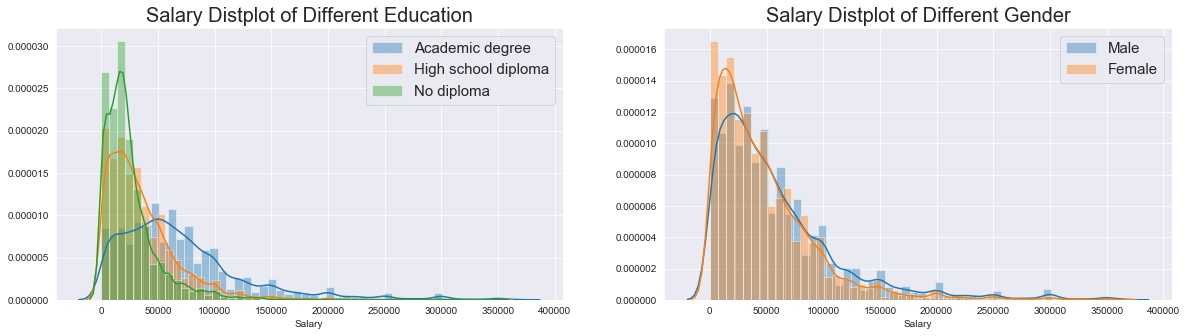

In [12]:
df=pd.read_csv("salary.csv")
df=df[df["Salary"]!=0]
fig,ax=plt.subplots(1,2,figsize=(20,5))

# Education
edu_list=["Academic degree","High school diploma","No diploma"]
for edu in edu_list:
    sns.distplot(df[df["Education"]==edu]["Salary"], kde=True,label=edu,ax=ax[0])
ax[0].legend(loc="best",fontsize=15)
ax[0].set_title("Salary Distplot of Different Education",fontsize=20)

# Gender
gender_list=["Male","Female"]
for gender in gender_list:
    sns.distplot(df[df["Gender"]==gender]["Salary"], kde=True,label=gender,ax=ax[1])
ax[1].legend(loc="best",fontsize=15)
ax[1].set_title("Salary Distplot of Different Gender",fontsize=20)
plt.show()

## HW-U1-4 
阅读用 Python 对新冠病毒做数据分析的介绍：https://tech.sina.com.cn/roll/2020-02-19/doc-iimxxstf2671241.shtml 基于这篇文中提供的数据，从网站上搜索Novel Corona Virus 2019 Dataset并获得获得最新的数据；参考上文，用Python画出如下柱状图：

### (1)数据显示的除中国以外的，发病最高的10个国家的确诊数

Text(0.5, 1.0, '10 Most Confirmed Countries')

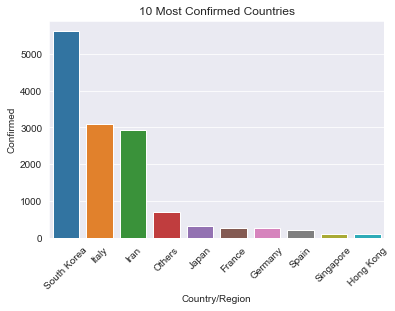

In [13]:
df=pd.read_csv("time_series_19-covid-Confirmed.csv")
df=df[df["Country/Region"]!="Mainland China"]
df=df[["Country/Region","3/4/20"]]
data=df.sort_values(by="3/4/20",ascending=False).iloc[0:10]
sns.barplot(x="Country/Region",y="3/4/20",data=data)
plt.xticks(rotation=45)
plt.ylabel("Confirmed")
plt.title("10 Most Confirmed Countries")

### (2)在数据记录的最近一段时间确诊数的变化状况 （任何地区/国家）

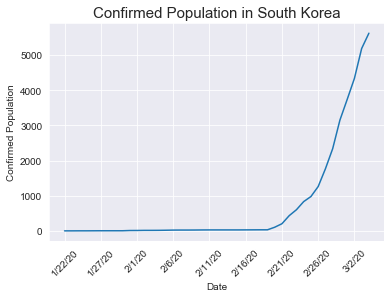

In [14]:
# confirmed increase in South Korea
df=pd.read_csv("time_series_19-covid-Confirmed.csv")
df=df[df["Country/Region"]=="South Korea"]
df=df.drop(["Province/State","Lat","Long"],axis=1)
df=df.set_index("Country/Region").T
plt.plot(df.index,df["South Korea"])
plt.xticks(list(df.index)[::5],rotation=45)
plt.xlabel('Date')
plt.ylabel("Confirmed Population")
plt.title("Confirmed Population in South Korea",fontsize=15)
plt.show()